In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
file_path = './dataset/insurance_fraud.csv'  # Update to the correct file path
df = pd.read_csv(file_path)

In [3]:
# Corrected features list
features = ['age', 'policy_annual_premium', 'months_as_customer', 'total_claim_amount',
            'umbrella_limit', 'number_of_vehicles_involved', 'incident_hour_of_the_day', 
            'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 
            'policy_state', 'insured_sex', 'insured_education_level', 
            'insured_occupation', 'insured_hobbies', 'incident_type', 
            'collision_type', 'incident_severity', 'property_damage', 
            'police_report_available']

# Extract the features from the dataframe
to_model_columns = df[features].copy()

# Convert categorical columns to 'category' data type and encode them
categorical_columns = ['policy_state', 'insured_sex', 'insured_education_level', 
                    'insured_occupation', 'insured_hobbies', 'incident_type', 
                    'collision_type', 'incident_severity', 'property_damage', 
                    'police_report_available']

for column in categorical_columns:
    to_model_columns[column] = to_model_columns[column].astype('category').cat.codes

# Fitting the Isolation Forest model
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12),
                    max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(to_model_columns)

# Predicting anomalies
pred = clf.predict(to_model_columns)
to_model_columns['anomaly'] = pred

# Perform PCA to reduce the data to three dimensions for visualization
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
# Normalize the metrics
X = scaler.fit_transform(to_model_columns)
X_reduce = pca.fit_transform(X)

# Identify outlier indices
outlier_index = to_model_columns[to_model_columns['anomaly'] == -1].index

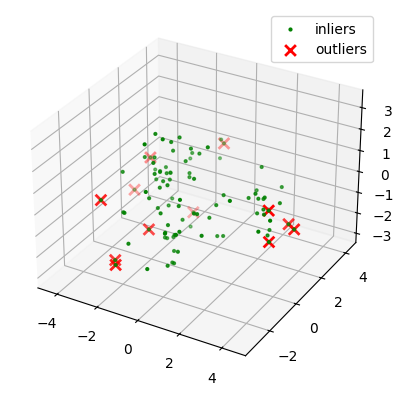

In [4]:
# Prepare the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers", c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index, 0], X_reduce[outlier_index, 1], X_reduce[outlier_index, 2],
        lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()

# Show the plot
plt.show()

In [5]:
# Clean up the 'anomaly' column for output
cleanup_nums = {"anomaly": {1: "Normal", -1: "Anomaly"}}
to_model_columns.replace(cleanup_nums, inplace=True)

# Print out the anomaly count
to_model_columns['anomaly'].value_counts()

anomaly
Normal     87
Anomaly    12
Name: count, dtype: int64